In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from osprey.actions.post_reader import postreader_averaged 
from osprey.graphics.hovmoller import hovmoller
from osprey.means.means import cost

In [3]:
# TEST on broadcast

In [4]:
field = postreader_averaged(expname='lfr0', startyear=2390, endyear=2400, varlabel='thetao', diagname='field')

2024-09-11 14:03:15,398 - INFO - File to be loaded /perm/itas/ece4/lfr0/nemo/field_thetao_base_2390-2400.nc
2024-09-11 14:03:15,500 - INFO - Averaged data found.


In [11]:
field['thetao']

<xarray.DataArray 'thetao' (z: 31, y: 148, x: 180)> Size: 3MB
[825840 values with dtype=float32]
Coordinates:
  * y        (y) int64 1kB 0 1 2 3 4 5 6 7 8 ... 140 141 142 143 144 145 146 147
  * x        (x) int64 1kB 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
Attributes:
    units:      degC
    long_name:  temperature

In [5]:
from osprey.actions.reader import reader_nemo

In [6]:
data = reader_nemo(expname='lfr0', startyear=1990, endyear=2059)

2024-09-11 14:03:15,513 - INFO - Files to be loaded ['/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1990-1990.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1991-1991.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1992-1992.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1993-1993.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1994-1994.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1995-1995.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1996-1996.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1997-1997.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1998-1998.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_1999-1999.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2000-2000.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2001-2001.nc', '/ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_

In [13]:
data['thetao']

<xarray.DataArray 'thetao' (time: 840, z: 31, y: 148, x: 180)> Size: 3GB
dask.array<concatenate, shape=(840, 31, 148, 180), dtype=float32, chunksize=(1, 31, 148, 180), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    lon      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
  * time     (time) object 7kB 1990-01-16 12:00:00 ... 2059-12-16 12:00:00
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_potential_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  5400 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 5400 s)

In [7]:
from osprey.means.means import spacemean

In [8]:
vec = spacemean(data=data, varname='thetao', ndim='2D')

In [9]:
vec

<xarray.DataArray 'thetao' (time: 840, z: 31)> Size: 208kB
dask.array<truediv, shape=(840, 31), dtype=float64, chunksize=(1, 31), chunktype=numpy.ndarray>
Coordinates:
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
  * time     (time) object 7kB 1990-01-16 12:00:00 ... 2059-12-16 12:00:00

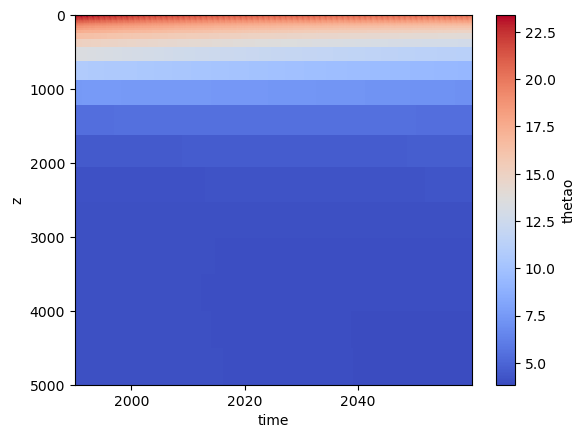

In [12]:
vec.plot(x='time', y='z', cmap=plt.cm.coolwarm)
plt.ylim(0,5000)
# Invert the y-axis
plt.gca().invert_yaxis()

In [16]:
xdata = data - field

In [17]:
xdata

<xarray.Dataset> Size: 3GB
Dimensions:  (y: 148, x: 180, z: 31, time: 840)
Coordinates:
    lat      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    lon      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
  * time     (time) object 7kB 1990-01-16 12:00:00 ... 2059-12-16 12:00:00
  * y        (y) int64 1kB 0 1 2 3 4 5 6 7 8 ... 140 141 142 143 144 145 146 147
  * x        (x) int64 1kB 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179
Data variables:
    thetao   (time, z, y, x) float32 3GB dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>

In [18]:
xvec = spacemean(data=xdata, varname='thetao', ndim='2D')

In [19]:
xvec

<xarray.DataArray 'thetao' (time: 840, z: 31)> Size: 208kB
dask.array<truediv, shape=(840, 31), dtype=float64, chunksize=(1, 31), chunktype=numpy.ndarray>
Coordinates:
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
  * time     (time) object 7kB 1990-01-16 12:00:00 ... 2059-12-16 12:00:00

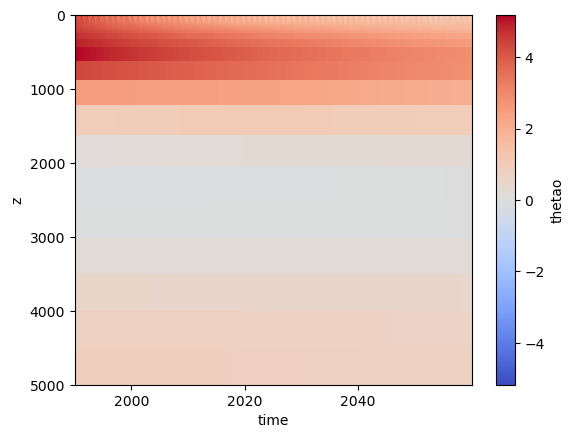

In [20]:
xvec.plot(x='time', y='z', cmap=plt.cm.coolwarm)
plt.ylim(0,5000)
plt.gca().invert_yaxis()

In [21]:
ydata = (data - field)/field

In [22]:
yvec = spacemean(data=ydata, varname='thetao', ndim='2D')

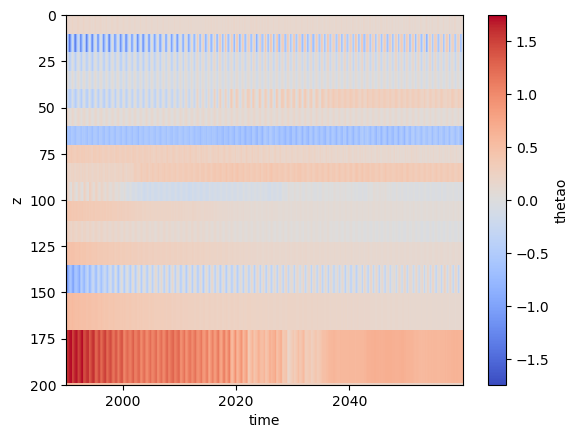

In [25]:
yvec.plot(x='time', y='z', cmap=plt.cm.coolwarm)
plt.ylim(0,200)
plt.gca().invert_yaxis()